# EDA Train/Test Data

### Contents
- [Datasets](#datasets)
- [Data Import](#import)
- [Data Cleaning](#cleaning)
- [Exploratory Data Analysis](#eda)
- [Summary](#sum)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Datasets<a id='datasets'></a>

Datasource from [Kaggle](https://www.kaggle.com/c/predict-west-nile-virus/data):

train.csv, test.csv - the training and test set of the main dataset. The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set you are requested to predict the test results for 2008, 2010, 2012, and 2014.

- Id: the id of the record

- Date: date that the WNV test is performed

- Address: approximate address of the location of trap. This is used to send to the GeoCoder. 

- Species: the species of mosquitos

- Block: block number of address

- Street: street name

- Trap: Id of the trap

- AddressNumberAndStreet: approximate address returned from GeoCoder

- Latitude, Longitude: Latitude and Longitude returned from GeoCoder

- AddressAccuracy: accuracy returned from GeoCoder

- NumMosquitos: number of mosquitoes caught in this trap

- WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

### Data Import<a id='import'></a>

In [136]:
# Load data
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')

In [138]:
# Train dataset
print(train.shape)
train.head(3)

(10506, 12)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [142]:
#Check for null values 
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [144]:
# Summary stats
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Block,10506.0,35.687797,24.339468,10.000000,12.000000,33.000000,52.000000,98.000000
Latitude,10506.0,41.841139,0.112742,41.644612,41.732984,41.846283,41.954690,42.017430
Longitude,10506.0,-87.699908,0.096514,-87.930995,-87.760070,-87.694991,-87.627796,-87.531635
AddressAccuracy,10506.0,7.819532,1.452921,3.000000,8.000000,8.000000,9.000000,9.000000
NumMosquitos,10506.0,12.853512,16.133816,1.000000,2.000000,5.000000,17.000000,50.000000
WnvPresent,10506.0,0.052446,0.222936,0.000000,0.000000,0.000000,0.000000,1.000000


Per our Kaggle [datasource](https://www.kaggle.com/c/predict-west-nile-virus/data), the dataset results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. 

Confirmed that the max `NumMosquitos` is 50.

In [147]:
# Test dataset
print(test.shape)
test.head(3)

(116293, 11)


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [151]:
#Check for null values 
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

Overview of datasets:
- The train set has 10506 rows while the test set has 116293 rows
- There no null values in both datasets (thankfully!)
- `WnvPresent` is the target variable so it's only found in the train set and not the test set
- `Id` is only present in the test set as it's meant for Kaggle submissions
- `NumMosquitos` will be removed for modelling in later notebooks as it is an additional column in the train set
- Columns related to location and address will likely have a high correlation

    
Next steps for data cleaning:
- Convert column names to lowercase
- Convert `Date` to datetime and create new columns for day of week, month and year
- `AddressNumberAndStreet`, `Address`, `Block` and `Street` will most likely be removed when modelling as we already have long/lat info.

### Data Cleaning<a id='cleaning'></a>

In [155]:
# Convert columns to lowercase
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [157]:
# Check train
train.head(1)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [159]:
# Check test
test.head(1)

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


Successfully dropped columns and converted column names to lowercase.

In [162]:
# Create function to convert date columns to date time and new columns for day, month, year

def convert_date(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].map(lambda x: x.strftime('%Y')) 
    df['month'] = df['date'].map(lambda x: x.strftime('%b')) 
    df['day'] = df['date'].map(lambda x: x.strftime('%d')) 
    df['day_of_week'] = df['date'].map(lambda x: x.strftime('%a')) 

In [164]:
# Apply convert_date function to train and test sets
convert_date(train)
convert_date(test)

In [165]:
# Check train set
train.head(2)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,day,day_of_week
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,May,29,Tue
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,2007,May,29,Tue


In [166]:
# Check test set
test.head(2)

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,year,month,day,day_of_week
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,Jun,11,Wed
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,Jun,11,Wed


Datasets have been successfully converted.

In [171]:
# Review nummosquitos = 50 (implies that there may be duplicate rows)
train[train['nummosquitos'] == 50]

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,day,day_of_week
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0,2007,Jul,11,Wed
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0,2007,Jul,11,Wed
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0,2007,Jul,11,Wed
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0,2007,Jul,11,Wed
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0,2007,Jul,11,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10240,2013-09-12,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,1,2013,Sep,12,Thu
10242,2013-09-12,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,0,2013,Sep,12,Thu
10259,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0,2013,Sep,12,Thu
10262,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0,2013,Sep,12,Thu


### Exploratory Data Analysis<a id='eda'></a>

#### Understanding distribution of `wnvpresent`:

In [175]:
train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,day,day_of_week
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,May,29,Tue
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,May,29,Tue
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,May,29,Tue
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,May,29,Tue
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,May,29,Tue


In [177]:
# Create df for wnvpresent count

#train['wnvpresent'].value_counts()
df_wnvcount = pd.DataFrame(train['wnvpresent'].value_counts())
df_wnvcount = df_wnvcount.reset_index()
df_wnvcount.rename(columns = {
                        'index' : 'wnvpresent'
                         #   ,
                        # 'wnvpresent' : 'count'
                        }, inplace=True)
# df_wnvcount.rename(columns = {
#                         'wnvpresent' : 'count'
#                         }, inplace=True)
df_wnvcount

,wnvpresent,count
0,0,9955
1,1,551


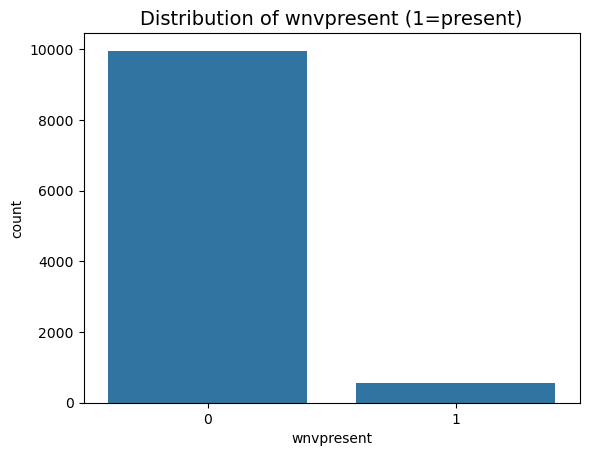

In [179]:
# Plot distribution of wnvpresent

sns.barplot(x='wnvpresent', y='count', data=df_wnvcount)
plt.title('Distribution of wnvpresent (1=present)', size=14);

The distribution of our target is highly skewed and we will be stratifying our data later at train-test split to account for the imbalance.

#### Overview of the relationship of WNV Features:

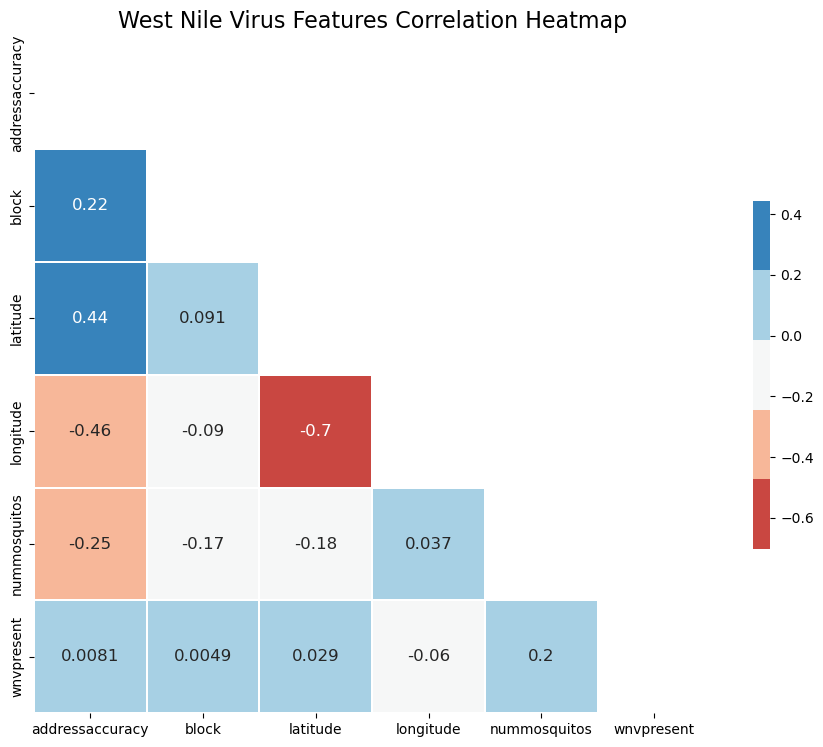

In [194]:
# Order columns
train_copy = train[train.columns.sort_values()]

# Plot heatmap

# Set up mask to be "True" in the upper triangle
mask = np.zeros_like(train_copy.corr(numeric_only = True))
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (9,9))
sns.heatmap(train_copy.corr(numeric_only = True),
            mask = mask,
            square = True,
            linewidth = 0.1,
            cbar_kws = {'shrink':0.4},
            cmap = sns.color_palette("RdBu", 5),
            annot = True,
            annot_kws = {'size': 12})

plt.xticks(size=10)
plt.yticks(size=10)

plt.title("West Nile Virus Features Correlation Heatmap",fontsize=16)

plt.tight_layout();

Like we suspected earlier, there is a positive correlation between location/address features. There is also a positive correlation between `wnvpresent` and `nummosquitos`.

In [197]:
# Drop columns in train and test
train.drop(columns=['address', 'block', 'street', 'addressnumberandstreet', 'addressaccuracy'], inplace=True)
test.drop(columns=['address', 'block', 'street', 'addressnumberandstreet', 'addressaccuracy'], inplace=True)

#### Explore relationship of `wnvpresent` and `nummosquitos`:

In [202]:
train.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,day_of_week
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007,May,29,Tue
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,2007,May,29,Tue
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,2007,May,29,Tue
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007,May,29,Tue
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,2007,May,29,Tue


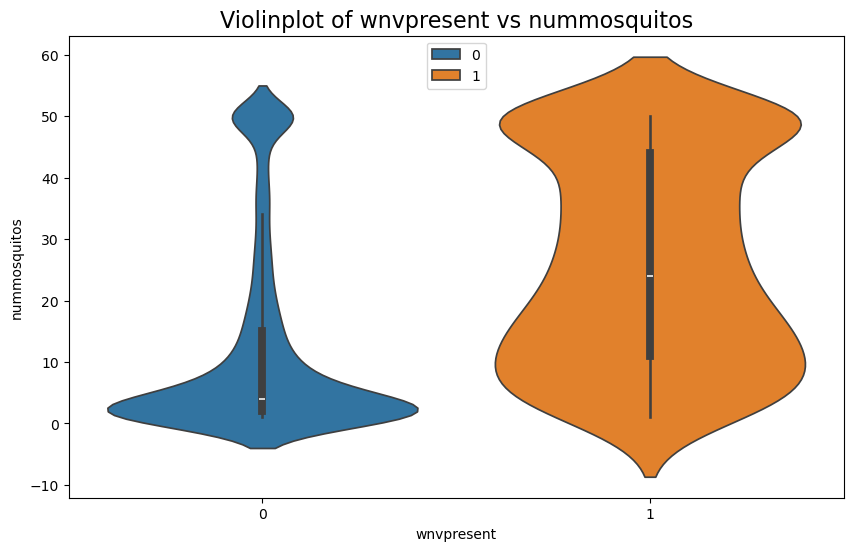

In [210]:
# Plot boxplot

plt.subplots(figsize=(10,6))
sns.violinplot(x='wnvpresent',y='nummosquitos', data=train, hue='wnvpresent')
plt.title('Violinplot of wnvpresent vs nummosquitos', size=16)
plt.legend(loc=9);

Unsurprisingly, the more mosquitos there are in the trap, the more likely WNV is present. In the cases where WNV isn't present, the number of mosquitoes tend to center around the median value.

#### Explore relationship of `wnvpresent` and `species`:

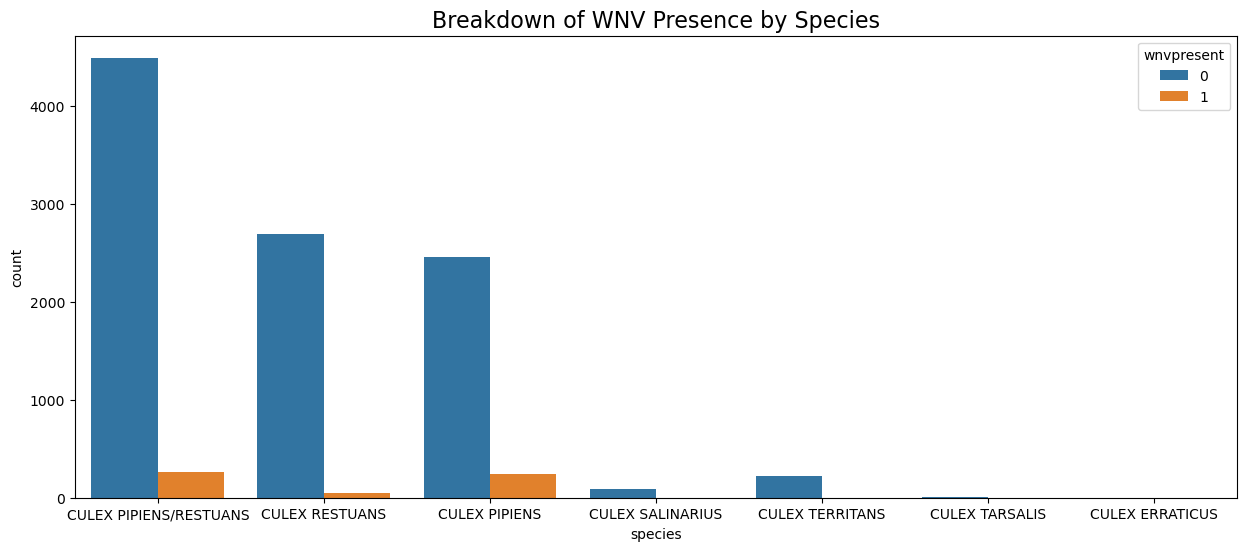

In [214]:
# Plot countplot by series

plt.subplots(figsize=(15,6))
sns.countplot(x='species', data=train, hue='wnvpresent')
plt.title('Breakdown of WNV Presence by Species', size=16);

From the dataset, WNV seems to be only transmitted by Culex Pipiens and Culex Restuans.

#### Exploring the effect of date of number of mosquitos and presence of WNV:

In [218]:
# Identify unique values of day_of_week
train['day_of_week'].unique()

array(['Tue', 'Fri', 'Mon', 'Wed', 'Thu'], dtype=object)

In [220]:
# Order day_of_week column
train['day_of_week'] = pd.Categorical(train['day_of_week'], categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

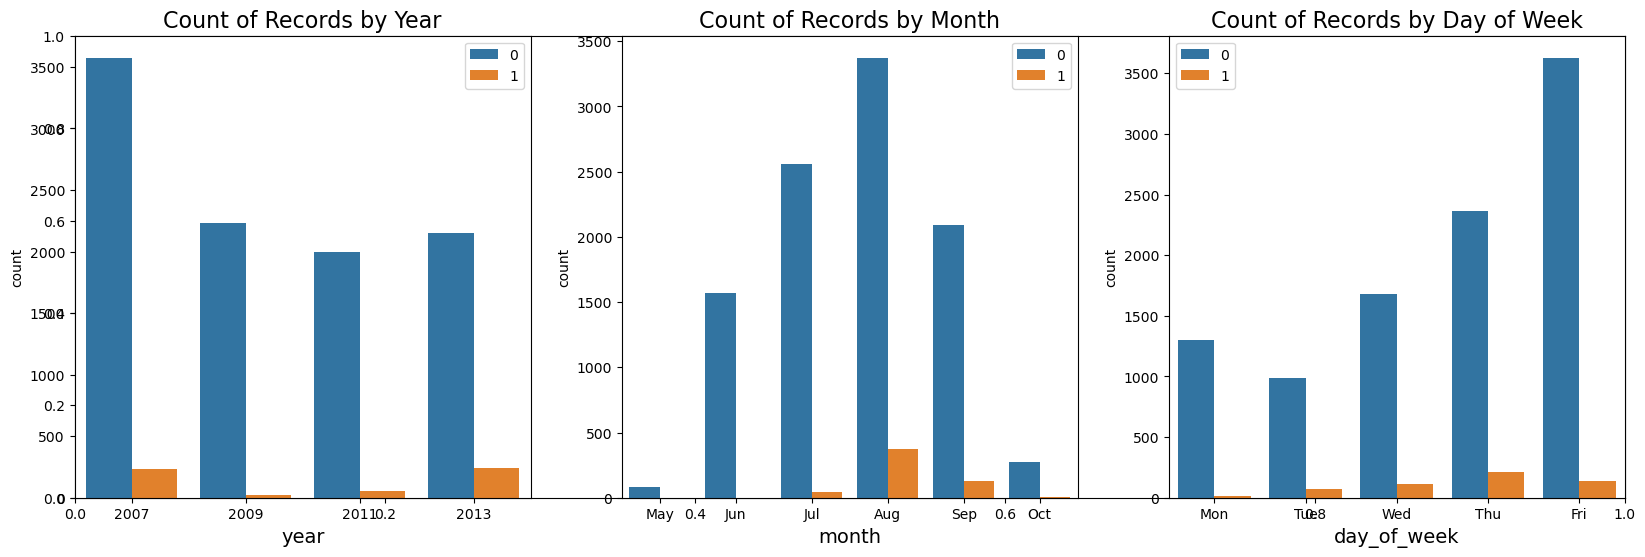

In [222]:
# Plot countplots for Year/Month/Day of Week

plt.subplots(figsize=(20,6))

# By year
ax1 = plt.subplot(1,3,1)
sns.countplot(x='year', data=train, hue='wnvpresent').set_xlabel('year', size=14)
plt.title('Count of Records by Year', size=16)
plt.xticks(size=10)
plt.legend(loc=1)

# By month
ax2 = plt.subplot(1,3,2)
sns.countplot(x='month', data=train, hue='wnvpresent').set_xlabel('month', size=14)
plt.title('Count of Records by Month', size=16)
plt.xticks(size=10)
plt.legend(loc=1)

# By day of week
ax3 = plt.subplot(1,3,3)
sns.countplot(x='day_of_week', data=train, hue='wnvpresent').set_xlabel('day_of_week', size=14)
plt.title('Count of Records by Day of Week', size=16)
plt.xticks(size=10)
plt.legend(loc=2);

- 2007 had the highest record count and it's worth noting that the porpotion of records with WNV present was higher in 2013. 
- August is the peak month with the highest number of records.
- Of the days of the week, Friday has the highest number of records which makes sense since the the traps are collecting mosquitos from Mon-Wed and are tested by the end of the week.

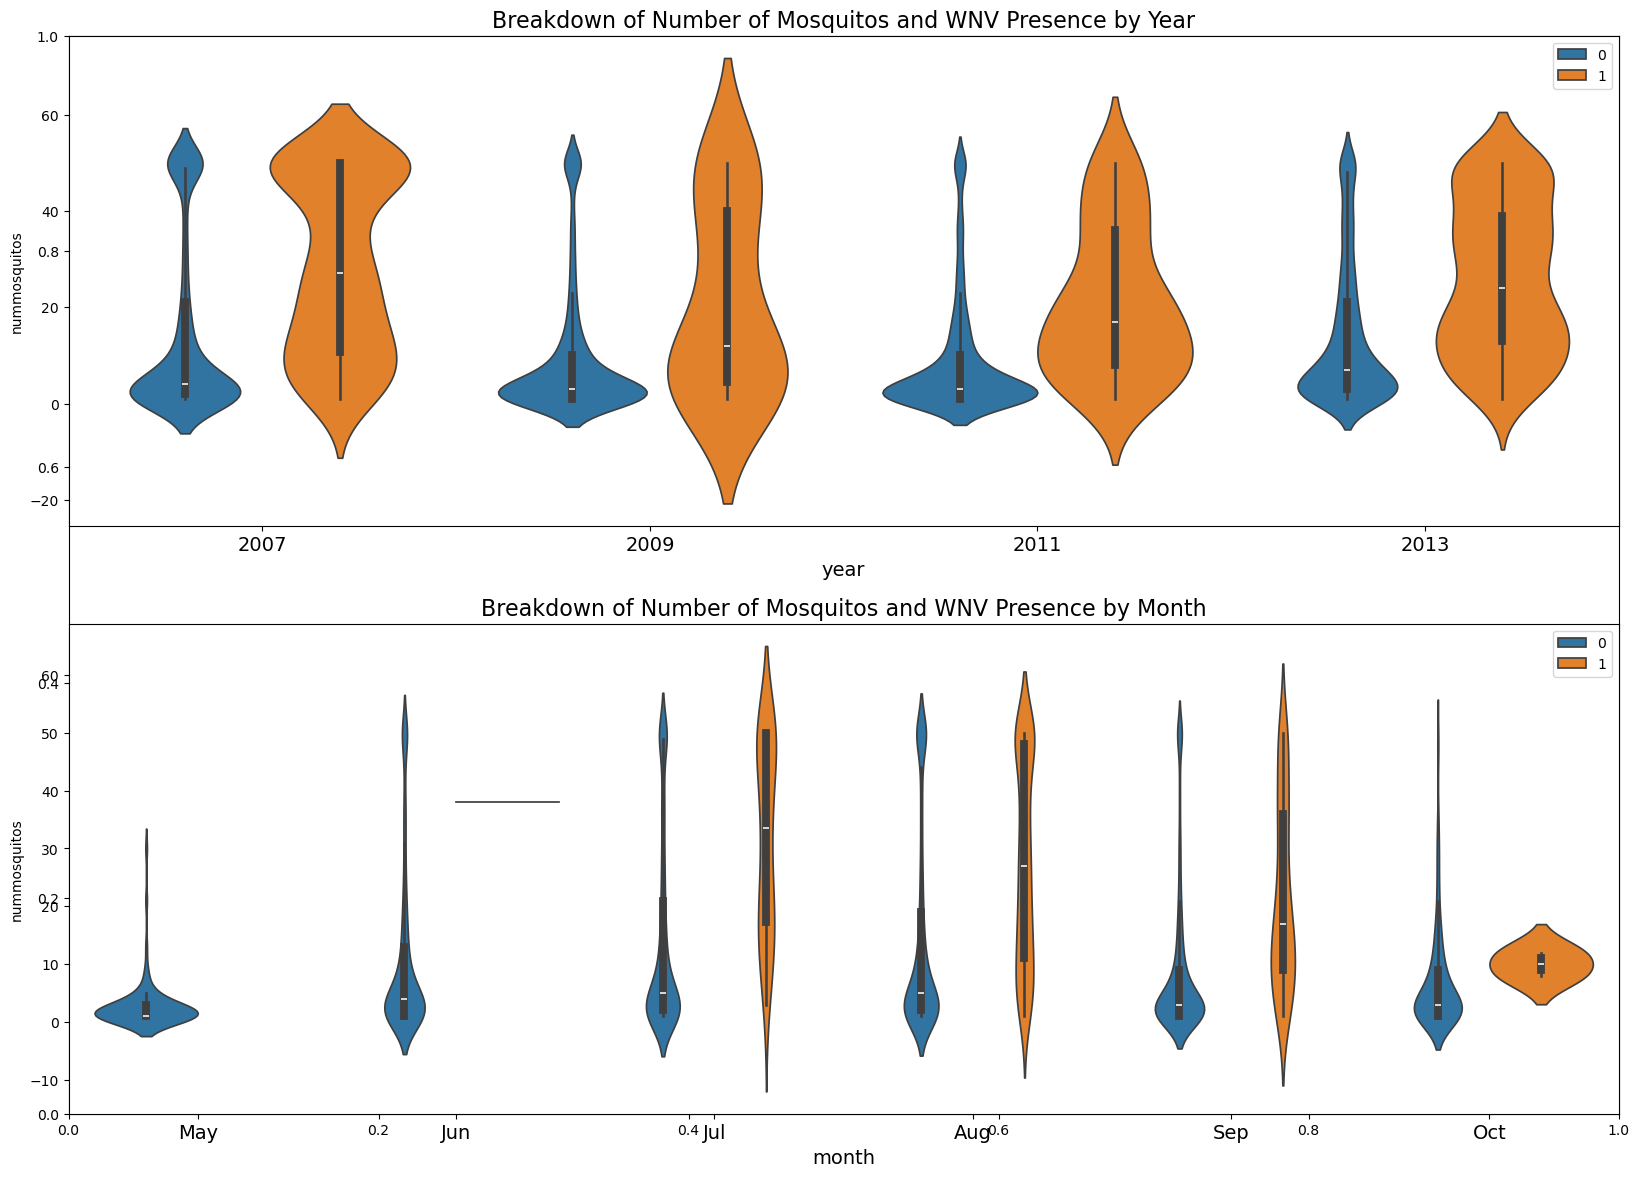

In [224]:
# Plot violinplots for Year/Month

plt.subplots(figsize=(20,14))

# By year
ax1 = plt.subplot(2,1,1)
sns.violinplot(x='year', y='nummosquitos', data=train, hue='wnvpresent').set_xlabel('year', size=14)
plt.title('Breakdown of Number of Mosquitos and WNV Presence by Year', size=16)
plt.xticks(size=14)
plt.legend(loc=1)

# By month
ax2 = plt.subplot(2,1,2)
sns.violinplot(x='month', y='nummosquitos', data=train, hue='wnvpresent').set_xlabel('month', size=14)
plt.title('Breakdown of Number of Mosquitos and WNV Presence by Month', size=16)
plt.xticks(size=14)
plt.legend(loc=1);

#### Exploring traps:

In [227]:
# Create df for wnvpresent count

train['trap'].value_counts()

df_trap = pd.DataFrame(train['trap'].value_counts())
df_trap = df_trap.reset_index()
df_trap.rename(columns = {
                        'index' : 'trap',
                        'trap' : 'count'
                        }, inplace=True)
df_trap

,count,count
0,T900,750
1,T115,542
2,T138,314
3,T002,185
4,T135,183
...,...,...
131,T238,7
132,T076,5
133,T094B,5
134,T237,3


### Clean up datasets

In [230]:
# Revert id in test set to Id as per the original for Kaggle submission
test.rename(columns = {'id' : 'Id'}, inplace=True)
test.head(1)

,Id,date,species,trap,latitude,longitude,year,month,day,day_of_week
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,2008,Jun,11,Wed


In [232]:
print(train.columns)
print(test.columns)

Index(['date', 'species', 'trap', 'latitude', 'longitude', 'nummosquitos',
       'wnvpresent', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')
Index(['Id', 'date', 'species', 'trap', 'latitude', 'longitude', 'year',
       'month', 'day', 'day_of_week'],
      dtype='object')


### Export Data

In [235]:
train.to_csv('./assets/train_clean.csv',index = False)
test.to_csv('./assets/test_clean.csv',index = False)

## Summary<a id='sum'></a>

- The distribution of our target (`wnvpresent`) is highly skewed and we will be stratifying our data later at train-test split to account for the imbalance.
- Date column has been split in to `year`, `month`, `day` and `day_of_week`.
- Unneccessary columns like `address`, `block`, `street`, `addressnumberandstreet`, `addressaccuracy` have been dropped.
- `train_clean.csv` and `test_clean.csv` will be used for the next notebook.